In [2]:
import pandas as pd
from Bio import SeqIO
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
mapping_dict = {"ALA": "A",
                "ARG": "R",
                "ASN": "N",
                "ASP": "D",
                "CYS": "C",
                "GLU": "E",
                "GLN": "Q",
                "GLY": "G",
                "HIS": "H",
                "ILE": "I",
                "LEU": "L",
                "LYS": "K",
                "MET": "M",
                "PHE": "F",
                "PRO": "P",
                "SER": "S",
                "THR": "T",
                "TRP": "W",
                "TYR": "Y",
                "VAL": "V",
                "TER": "*"
                }

def mut3_to_mut1(muts3):
    #convert three letter amino acid code to one letter amino acid code
    if muts3 == "wt":
        return "WT"
    else:
        muts1 = []
        muts3 = muts3.upper()
        muts3 = muts3.split(", ")
        for mut3 in muts3:
            mut3 = mut3[2:]
            muts1.append(mapping_dict[mut3[:3]]+ mut3[3:-3]+ mapping_dict[mut3[-3:]])
        return ":".join(muts1)

def mut_to_sequence(mut, wt_seq):
    #convert mutation to sequence
    if mut == "WT":
        return wt_seq
    else:
        muts = mut.split(":")
        seq = list(wt_seq)
        for mut in muts:
            pos = int(mut[1:-1])
            seq[pos-1] = mut[-1]
        return "".join(seq)

def get_num_mut(mut):
    #get the number of mutations
    if mut == "WT":
        return 0
    else:
        return len(mut.split(":"))

def get_hamm_dist(seq1, WT):
    #calculate hamming distance between two sequences
    return sum([1 for i in range(len(seq1)) if seq1[i] != WT[i]])

## TrpB (New, Merged 3site and 4site)
Merged and normalized from https://www.pnas.org/doi/10.1073/pnas.2400439121 and the accompanying Zenodo.

In [49]:
df = pd.read_csv("raw_data/TmTrpB_merged.csv")
#convert n_mut_mean to integer
df["n_mut_mean"] = df["n_mut_mean"].astype(int)
df

,seq_,muts_,norm_fitness_mean,norm_fitness_std,fitness_mean,fitness_std,active_mean,active_std,n_mut_mean,lib
0,MKGYFGPYGGQYVPEILMGALEELEAAYEGIMKDESFWKEFNDLLR...,T117A,0.147975,NaN,0.121344,NaN,1.0,NaN,1,TrpB3D
1,MKGYFGPYGGQYVPEILMGALEELEAAYEGIMKDESFWKEFNDLLR...,T117A:A119C,0.086008,NaN,0.070529,NaN,0.0,NaN,2,TrpB3D
2,MKGYFGPYGGQYVPEILMGALEELEAAYEGIMKDESFWKEFNDLLR...,T117A:A119D,0.041572,NaN,0.034090,NaN,0.0,NaN,2,TrpB3D
3,MKGYFGPYGGQYVPEILMGALEELEAAYEGIMKDESFWKEFNDLLR...,T117A:A119E,0.055187,NaN,0.045255,NaN,0.0,NaN,2,TrpB3D
4,MKGYFGPYGGQYVPEILMGALEELEAAYEGIMKDESFWKEFNDLLR...,T117A:A119F,0.028529,NaN,0.023395,NaN,0.0,NaN,2,TrpB3D
...,...,...,...,...,...,...,...,...,...,...
205131,MKGYFGPYGGQYVPEILMGALEELEAAYEGIMKDESFWKEFNDLLR...,T117Y:A118Y:A119S,0.014703,NaN,0.012056,NaN,0.0,NaN,3,TrpB3D
205132,MKGYFGPYGGQYVPEILMGALEELEAAYEGIMKDESFWKEFNDLLR...,T117Y:A118Y:A119T,0.010432,NaN,0.008554,NaN,0.0,NaN,3,TrpB3D
205133,MKGYFGPYGGQYVPEILMGALEELEAAYEGIMKDESFWKEFNDLLR...,T117Y:A118Y:A119V,-0.064043,NaN,-0.052517,NaN,0.0,NaN,3,TrpB3D
205134,MKGYFGPYGGQYVPEILMGALEELEAAYEGIMKDESFWKEFNDLLR...,T117Y:A118Y:A119W,-0.045570,NaN,-0.037369,NaN,0.0,NaN,3,TrpB3D


In [50]:
#srot and show values with higher norm_fitness_mean
df.sort_values("norm_fitness_mean", ascending=False).head(10)

,seq_,muts_,norm_fitness_mean,norm_fitness_std,fitness_mean,fitness_std,active_mean,active_std,n_mut_mean,lib
20113,MKGYFGPYGGQYVPEILMGALEELEAAYEGIMKDESFWKEFNDLLR...,V183A:F184I:V227K:S228G,2.450536,NaN,1.000000,NaN,1.0,NaN,4,TrpB4
28882,MKGYFGPYGGQYVPEILMGALEELEAAYEGIMKDESFWKEFNDLLR...,V183C:F184L:V227K:S228G,2.283982,NaN,0.932034,NaN,1.0,NaN,4,TrpB4
175029,MKGYFGPYGGQYVPEILMGALEELEAAYEGIMKDESFWKEFNDLLR...,F184L:V227K:S228G,2.260765,NaN,0.922559,NaN,1.0,NaN,3,TrpB4
20913,MKGYFGPYGGQYVPEILMGALEELEAAYEGIMKDESFWKEFNDLLR...,V183A:F184L:V227K:S228G,2.246062,NaN,0.916559,NaN,1.0,NaN,4,TrpB4
28089,MKGYFGPYGGQYVPEILMGALEELEAAYEGIMKDESFWKEFNDLLR...,V183C:F184I:V227K:S228G,2.229423,NaN,0.909769,NaN,1.0,NaN,4,TrpB4
75776,MKGYFGPYGGQYVPEILMGALEELEAAYEGIMKDESFWKEFNDLLR...,V183I:F184I:V227K:S228G,2.193591,NaN,0.895147,NaN,1.0,NaN,4,TrpB4
173434,MKGYFGPYGGQYVPEILMGALEELEAAYEGIMKDESFWKEFNDLLR...,F184I:V227K:S228G,2.162516,NaN,0.882466,NaN,1.0,NaN,3,TrpB4
24109,MKGYFGPYGGQYVPEILMGALEELEAAYEGIMKDESFWKEFNDLLR...,V183A:F184V:V227K:S228G,2.077869,NaN,0.847924,NaN,1.0,NaN,4,TrpB4
76573,MKGYFGPYGGQYVPEILMGALEELEAAYEGIMKDESFWKEFNDLLR...,V183I:F184L:V227K:S228G,2.072833,NaN,0.845869,NaN,1.0,NaN,4,TrpB4
32069,MKGYFGPYGGQYVPEILMGALEELEAAYEGIMKDESFWKEFNDLLR...,V183C:F184V:V227K:S228G,2.061882,NaN,0.841400,NaN,1.0,NaN,4,TrpB4


In [51]:
#find where the number of mutations is 0
df[df["n_mut_mean"] == 0]

,seq_,muts_,norm_fitness_mean,norm_fitness_std,fitness_mean,fitness_std,active_mean,active_std,n_mut_mean,lib
168732,MKGYFGPYGGQYVPEILMGALEELEAAYEGIMKDESFWKEFNDLLR...,WT,1.0,0.0,0.634977,0.204251,1.0,0.0,0,"TrpB3E,TrpB3F,TrpB4,TrpB3D,TrpB3H,TrpB3I,TrpB3G"


<Axes: xlabel='norm_fitness_mean', ylabel='Count'>

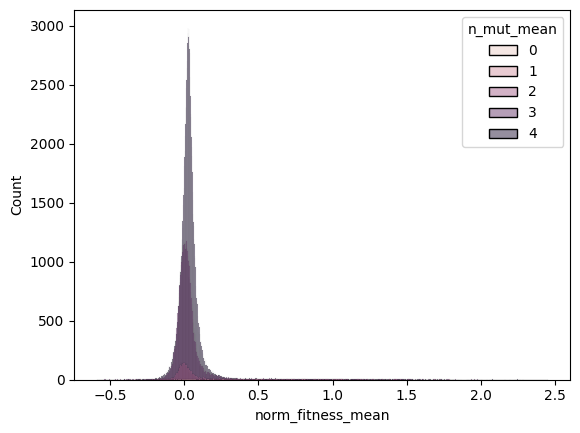

In [52]:
sns.histplot(x="norm_fitness_mean", data=df, hue="n_mut_mean")

In [53]:
train_df = df[df["n_mut_mean"] < 4]
train_df["split"] = "train"
train_df

#sample 10% of the sequences with 4 mutations as validation split
df_eval = df[df["n_mut_mean"] == 4]
df_validation = df_eval.sample(frac=0.10, random_state=42)
df_validation["split"] = "validation"
#sample 20% of the sequences with 4 mutations as test split
df_eval = df_eval.drop(df_validation.index)
df_test = df_eval.sample(frac=0.20, random_state=42)
df_test["split"] = "test"

df = pd.concat([train_df, df_validation, df_test])
#reorder based on original index
df = df.sort_index()

/tmp/ipykernel_49979/3539545695.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["split"] = "train"


In [54]:
sites = [117, 118, 119, 162, 166, 182, 183, 184, 185, 186, 227, 228, 230, 231, 301]
def get_combo(sequence, sites):
    #get the combination of amino acids at the specified sites
    sites = [i-1 for i in sites]
    return "".join([sequence[i] for i in sites])

In [57]:
#rename seq_ to sequence
df.rename(columns={"seq_": "sequence", "muts_": "mut", "norm_fitness_mean": "fitness", "n_mut_mean": "n_mut"}, inplace=True)
#convert negative fitness values to 0
df["fitness"] = df["fitness"].apply(lambda x: max(0, x))
df["Combo"] = df["sequence"].apply(get_combo, sites=sites)
df

,sequence,mut,fitness,norm_fitness_std,fitness_mean,fitness_std,active_mean,active_std,n_mut,lib,split,Combo
0,MKGYFGPYGGQYVPEILMGALEELEAAYEGIMKDESFWKEFNDLLR...,T117A,0.147975,NaN,0.121344,NaN,1.0,NaN,1,TrpB3D,train,AAALIYVFGSVSGSY
1,MKGYFGPYGGQYVPEILMGALEELEAAYEGIMKDESFWKEFNDLLR...,T117A:A119C,0.086008,NaN,0.070529,NaN,0.0,NaN,2,TrpB3D,train,AACLIYVFGSVSGSY
2,MKGYFGPYGGQYVPEILMGALEELEAAYEGIMKDESFWKEFNDLLR...,T117A:A119D,0.041572,NaN,0.034090,NaN,0.0,NaN,2,TrpB3D,train,AADLIYVFGSVSGSY
3,MKGYFGPYGGQYVPEILMGALEELEAAYEGIMKDESFWKEFNDLLR...,T117A:A119E,0.055187,NaN,0.045255,NaN,0.0,NaN,2,TrpB3D,train,AAELIYVFGSVSGSY
4,MKGYFGPYGGQYVPEILMGALEELEAAYEGIMKDESFWKEFNDLLR...,T117A:A119F,0.028529,NaN,0.023395,NaN,0.0,NaN,2,TrpB3D,train,AAFLIYVFGSVSGSY
...,...,...,...,...,...,...,...,...,...,...,...,...
205131,MKGYFGPYGGQYVPEILMGALEELEAAYEGIMKDESFWKEFNDLLR...,T117Y:A118Y:A119S,0.014703,NaN,0.012056,NaN,0.0,NaN,3,TrpB3D,train,YYSLIYVFGSVSGSY
205132,MKGYFGPYGGQYVPEILMGALEELEAAYEGIMKDESFWKEFNDLLR...,T117Y:A118Y:A119T,0.010432,NaN,0.008554,NaN,0.0,NaN,3,TrpB3D,train,YYTLIYVFGSVSGSY
205133,MKGYFGPYGGQYVPEILMGALEELEAAYEGIMKDESFWKEFNDLLR...,T117Y:A118Y:A119V,0.000000,NaN,-0.052517,NaN,0.0,NaN,3,TrpB3D,train,YYVLIYVFGSVSGSY
205134,MKGYFGPYGGQYVPEILMGALEELEAAYEGIMKDESFWKEFNDLLR...,T117Y:A118Y:A119W,0.000000,NaN,-0.037369,NaN,0.0,NaN,3,TrpB3D,train,YYWLIYVFGSVSGSY


(0.0, 100.0)

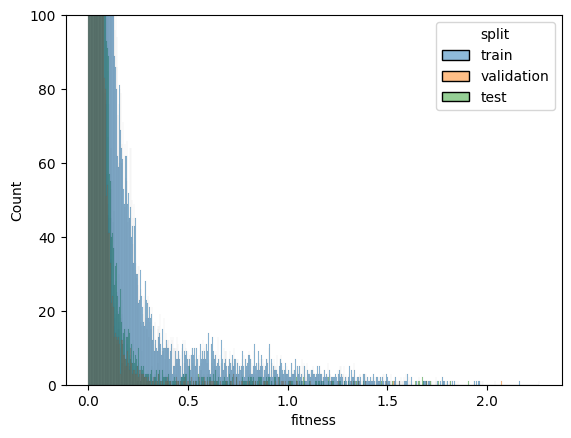

In [58]:
sns.histplot(x="fitness", data=df, hue="split")
plt.ylim(0, 100)

In [ ]:
df[['Combo', 'mut', "n_mut", 'fitness', 'split']].to_csv("TrpB/fitness.csv", index=False)

In [ ]:
df = pd.read_csv("TrpB/fitness.csv")
df[df["split"] == "test"]

,Combo,mut,n_mut,fitness,split
17153,TAALIYAAGSACGSY,V183A:F184A:V227A:S228C,4,0.138000,test
17154,TAALIYAAGSAFGSY,V183A:F184A:V227A:S228F,4,0.012648,test
17156,TAALIYAAGSCGGSY,V183A:F184A:V227C:S228G,4,0.356627,test
17160,TAALIYAAGSCTGSY,V183A:F184A:V227C:S228T,4,0.068215,test
17161,TAALIYAAGSDAGSY,V183A:F184A:V227D:S228A,4,0.000000,test
...,...,...,...,...,...
106151,TAALIYYYGSWFGSY,V183Y:F184Y:V227W:S228F,4,0.000000,test
106153,TAALIYYYGSWMGSY,V183Y:F184Y:V227W:S228M,4,0.000000,test
106155,TAALIYYYGSWTGSY,V183Y:F184Y:V227W:S228T,4,0.020395,test
106159,TAALIYYYGSYFGSY,V183Y:F184Y:V227Y:S228F,4,0.101262,test


### CreiLOV
Obtained from https://pubs.acs.org/doi/10.1021/acssynbio.2c00662.

In [42]:
singles_df = pd.read_excel("CreiLOV_singles.xlsx")
singles_df["experiment"] = "singles"
singles_df

,Unnamed: 0,rep1,rep2,rep3,mean,log_rep1,log_rep2,log_rep3,log_mean,experiment
0,wt,13642.3907,14855.184880,15912.464900,14803.34683,4.134890,4.171878,4.201737,4.170360,singles
1,p.Arg60Asp,25759.5100,26659.208650,26651.355730,26356.69000,4.410938,4.425847,4.425719,4.420891,singles
2,p.Thr7Ser,25817.6300,26426.821920,25983.035530,26075.83000,4.411916,4.422045,4.414690,4.416238,singles
3,p.Ala29His,26195.7300,26780.294410,24982.154220,25986.06000,4.418230,4.427815,4.397630,4.414740,singles
4,p.Gly26Thr,25376.8100,26196.456540,24196.204530,25256.49000,4.404437,4.418243,4.383747,4.402373,singles
...,...,...,...,...,...,...,...,...,...,...
2180,p.Ala11Tyr,457.1600,298.797094,392.309309,382.76000,2.660071,2.475376,2.593629,2.582923,singles
2181,p.Leu73Arg,396.4700,407.671182,338.907811,381.01000,2.598205,2.610310,2.530082,2.580942,singles
2182,p.Asn85Trp,302.4800,375.713275,458.801099,379.00000,2.480699,2.574857,2.661624,2.578638,singles
2183,p.Gly32Pro,324.2000,403.846383,347.119081,358.39000,2.510810,2.606216,2.540478,2.554353,singles


In [43]:
df = pd.read_excel("CreiLOV_multi.xlsx")
df["experiment"] = "multi"
df.columns = singles_df.columns #rename columns

#normalize the singles fitness values to the multi experiments via the WT
normalization = singles_df[singles_df["Unnamed: 0"] == "wt"]["log_mean"].values[0] - df[df["Unnamed: 0"] == "wt"]["log_mean"].values[0] 
singles_df["log_mean"] = singles_df["log_mean"] - normalization
singles_df

,Unnamed: 0,rep1,rep2,rep3,mean,log_rep1,log_rep2,log_rep3,log_mean,experiment
0,wt,13642.3907,14855.184880,15912.464900,14803.34683,4.134890,4.171878,4.201737,4.023230,singles
1,p.Arg60Asp,25759.5100,26659.208650,26651.355730,26356.69000,4.410938,4.425847,4.425719,4.273761,singles
2,p.Thr7Ser,25817.6300,26426.821920,25983.035530,26075.83000,4.411916,4.422045,4.414690,4.269108,singles
3,p.Ala29His,26195.7300,26780.294410,24982.154220,25986.06000,4.418230,4.427815,4.397630,4.267610,singles
4,p.Gly26Thr,25376.8100,26196.456540,24196.204530,25256.49000,4.404437,4.418243,4.383747,4.255243,singles
...,...,...,...,...,...,...,...,...,...,...
2180,p.Ala11Tyr,457.1600,298.797094,392.309309,382.76000,2.660071,2.475376,2.593629,2.435792,singles
2181,p.Leu73Arg,396.4700,407.671182,338.907811,381.01000,2.598205,2.610310,2.530082,2.433812,singles
2182,p.Asn85Trp,302.4800,375.713275,458.801099,379.00000,2.480699,2.574857,2.661624,2.431508,singles
2183,p.Gly32Pro,324.2000,403.846383,347.119081,358.39000,2.510810,2.606216,2.540478,2.407223,singles


In [44]:
df = pd.concat([df, singles_df])
df["mut"] = df["Unnamed: 0"].apply(mut3_to_mut1)
df = df.drop_duplicates(subset=["Unnamed: 0"]) #for singles that were measured in both experiments, use the fitness from the multi-mutant experiment, could potentially average in the future
#df = df.groupby(["Unnamed: 0", "experiment"]).mean().reset_index() #assume that mean across log fitness is ok
#drop sequences that contain *
df = df[~df["mut"].str.contains("\*")]
wt_seq = str(SeqIO.read("../CreiLOV.fasta", "fasta").seq)
df["sequence"] = df.apply(lambda x: mut_to_sequence(x["mut"], wt_seq), axis=1)
df

,Unnamed: 0,rep1,rep2,rep3,mean,log_rep1,log_rep2,log_rep3,log_mean,experiment,mut,sequence
0,wt,11436.15241,11590.593910,8621.598935,10549.44842,4.058280,4.064106,3.935588,4.023230,multi,WT,MAGLRHTFVVADATLPDCPLVYASEGFYAMTGYGPDEVLGHNARFL...
1,p.Thr7Ser,15190.43071,15177.975890,10986.791320,13785.06597,4.181570,4.181214,4.040871,4.139409,multi,T7S,MAGLRHSFVVADATLPDCPLVYASEGFYAMTGYGPDEVLGHNARFL...
2,p.Arg5Asp,11742.95356,14620.048770,12136.214420,12833.07225,4.069777,4.164949,4.084083,4.108331,multi,R5D,MAGLDHTFVVADATLPDCPLVYASEGFYAMTGYGPDEVLGHNARFL...
3,p.Thr7His,12282.68264,13610.056920,12035.501970,12642.74718,4.089293,4.133860,4.080464,4.101841,multi,T7H,MAGLRHHFVVADATLPDCPLVYASEGFYAMTGYGPDEVLGHNARFL...
4,p.Leu4Asn,12075.63375,10924.853670,8659.384022,10553.29048,4.081910,4.038416,3.937487,4.023388,multi,L4N,MAGNRHTFVVADATLPDCPLVYASEGFYAMTGYGPDEVLGHNARFL...
...,...,...,...,...,...,...,...,...,...,...,...,...
2180,p.Ala11Tyr,457.16000,298.797094,392.309309,382.76000,2.660071,2.475376,2.593629,2.435792,singles,A11Y,MAGLRHTFVVYDATLPDCPLVYASEGFYAMTGYGPDEVLGHNARFL...
2181,p.Leu73Arg,396.47000,407.671182,338.907811,381.01000,2.598205,2.610310,2.530082,2.433812,singles,L73R,MAGLRHTFVVADATLPDCPLVYASEGFYAMTGYGPDEVLGHNARFL...
2182,p.Asn85Trp,302.48000,375.713275,458.801099,379.00000,2.480699,2.574857,2.661624,2.431508,singles,N85W,MAGLRHTFVVADATLPDCPLVYASEGFYAMTGYGPDEVLGHNARFL...
2183,p.Gly32Pro,324.20000,403.846383,347.119081,358.39000,2.510810,2.606216,2.540478,2.407223,singles,G32P,MAGLRHTFVVADATLPDCPLVYASEGFYAMTPYGPDEVLGHNARFL...


In [45]:
#make a "split" column 
#train split includes sequences with 1-4 mutations
#test split includes sequences with 5 mutations
df["num_mut"] = df["mut"].apply(get_num_mut)
#random sample the variants with 5 mutations into validation (75%) and test (25%)
df.loc[df["num_mut"] < 5, "split"] = "train"
df.loc[df["num_mut"] > 5, "split"] = "other"
#drop the variants with 5 mutations
train_df = df[df["num_mut"] != 5]
train_df
#sample 

,Unnamed: 0,rep1,rep2,rep3,mean,log_rep1,log_rep2,log_rep3,log_mean,experiment,mut,sequence,num_mut,split
0,wt,11436.15241,11590.593910,8621.598935,10549.44842,4.058280,4.064106,3.935588,4.023230,multi,WT,MAGLRHTFVVADATLPDCPLVYASEGFYAMTGYGPDEVLGHNARFL...,0,train
1,p.Thr7Ser,15190.43071,15177.975890,10986.791320,13785.06597,4.181570,4.181214,4.040871,4.139409,multi,T7S,MAGLRHSFVVADATLPDCPLVYASEGFYAMTGYGPDEVLGHNARFL...,1,train
2,p.Arg5Asp,11742.95356,14620.048770,12136.214420,12833.07225,4.069777,4.164949,4.084083,4.108331,multi,R5D,MAGLDHTFVVADATLPDCPLVYASEGFYAMTGYGPDEVLGHNARFL...,1,train
3,p.Thr7His,12282.68264,13610.056920,12035.501970,12642.74718,4.089293,4.133860,4.080464,4.101841,multi,T7H,MAGLRHHFVVADATLPDCPLVYASEGFYAMTGYGPDEVLGHNARFL...,1,train
4,p.Leu4Asn,12075.63375,10924.853670,8659.384022,10553.29048,4.081910,4.038416,3.937487,4.023388,multi,L4N,MAGNRHTFVVADATLPDCPLVYASEGFYAMTGYGPDEVLGHNARFL...,1,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2180,p.Ala11Tyr,457.16000,298.797094,392.309309,382.76000,2.660071,2.475376,2.593629,2.435792,singles,A11Y,MAGLRHTFVVYDATLPDCPLVYASEGFYAMTGYGPDEVLGHNARFL...,1,train
2181,p.Leu73Arg,396.47000,407.671182,338.907811,381.01000,2.598205,2.610310,2.530082,2.433812,singles,L73R,MAGLRHTFVVADATLPDCPLVYASEGFYAMTGYGPDEVLGHNARFL...,1,train
2182,p.Asn85Trp,302.48000,375.713275,458.801099,379.00000,2.480699,2.574857,2.661624,2.431508,singles,N85W,MAGLRHTFVVADATLPDCPLVYASEGFYAMTGYGPDEVLGHNARFL...,1,train
2183,p.Gly32Pro,324.20000,403.846383,347.119081,358.39000,2.510810,2.606216,2.540478,2.407223,singles,G32P,MAGLRHTFVVADATLPDCPLVYASEGFYAMTPYGPDEVLGHNARFL...,1,train


In [46]:
#sample 75% of the sequences with 5 mutations as validation split
df_eval = df[df["num_mut"] == 5]
df_validation = df_eval.sample(frac=0.75, random_state=42)
df_validation["split"] = "validation"
df_test = df_eval.drop(df_validation.index)
df_test["split"] = "test"

df = pd.concat([train_df, df_validation, df_test])

In [47]:
#find the row with the maximum value
df[df["log_mean"] == df["log_mean"].max()]

,Unnamed: 0,rep1,rep2,rep3,mean,log_rep1,log_rep2,log_rep3,log_mean,experiment,mut,sequence,num_mut,split
1,p.Arg60Asp,25759.51,26659.20865,26651.35573,26356.69,4.410938,4.425847,4.425719,4.273761,singles,R60D,MAGLRHTFVVADATLPDCPLVYASEGFYAMTGYGPDEVLGHNARFL...,1,train


In [48]:
df["split"].value_counts()

split
other         151085
validation      7202
train           6842
test            2401
Name: count, dtype: int64

In [ ]:
#rename log_mean to fitness
df = df.rename(columns={"log_mean": "fitness", "sequence": "Combo"})
#don't normalize to the maximum fitness for now
# df["fitness"] = df["fitness"]/df["fitness"].max()
df.to_csv("../CreiLOV/fitness.csv", index=False)

In [ ]:
data = pd.read_csv("CreiLOV/fitness.csv")
#rename combo to Combo
data = data.rename(columns={"combo": "Combo"})
data.to_csv("../CreiLOV/fitness.csv", index=False)
data

,Unnamed: 0,rep1,rep2,rep3,mean,log_rep1,log_rep2,log_rep3,fitness,experiment,mut,Combo,num_mut,split
0,wt,11436.152410,11590.593910,8621.598935,10549.448420,4.058280,4.064106,3.935588,4.023230,multi,WT,MAGLRHTFVVADATLPDCPLVYASEGFYAMTGYGPDEVLGHNARFL...,0,train
1,p.Thr7Ser,15190.430710,15177.975890,10986.791320,13785.065970,4.181570,4.181214,4.040871,4.139409,multi,T7S,MAGLRHSFVVADATLPDCPLVYASEGFYAMTGYGPDEVLGHNARFL...,1,train
2,p.Arg5Asp,11742.953560,14620.048770,12136.214420,12833.072250,4.069777,4.164949,4.084083,4.108331,multi,R5D,MAGLDHTFVVADATLPDCPLVYASEGFYAMTGYGPDEVLGHNARFL...,1,train
3,p.Thr7His,12282.682640,13610.056920,12035.501970,12642.747180,4.089293,4.133860,4.080464,4.101841,multi,T7H,MAGLRHHFVVADATLPDCPLVYASEGFYAMTGYGPDEVLGHNARFL...,1,train
4,p.Leu4Asn,12075.633750,10924.853670,8659.384022,10553.290480,4.081910,4.038416,3.937487,4.023388,multi,L4N,MAGNRHTFVVADATLPDCPLVYASEGFYAMTGYGPDEVLGHNARFL...,1,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167525,"p.Gly34Thr, p.Gln47Val, p.Val107Met, p.Val109G...",5181.129425,6104.809438,6361.639254,5882.526039,3.714424,3.785672,3.803569,3.769564,multi,G34T:Q47V:V107M:V109Q:T113E,MAGLRHTFVVADATLPDCPLVYASEGFYAMTGYTPDEVLGHNARFL...,5,test
167526,"p.Gln47Val, p.Ile92Cys, p.Val107Met, p.Val109G...",6049.557534,5601.168538,5754.603411,5801.776494,3.781724,3.748279,3.760015,3.763561,multi,Q47V:I92C:V107M:V109Q:T113E,MAGLRHTFVVADATLPDCPLVYASEGFYAMTGYGPDEVLGHNARFL...,5,test
167527,"p.Gln47Cys, p.Asp61Gln, p.Val107Met, p.Val109G...",5801.181327,6344.620538,4863.240261,5669.680709,3.763516,3.802406,3.686926,3.753559,multi,Q47C:D61Q:V107M:V109Q:T113E,MAGLRHTFVVADATLPDCPLVYASEGFYAMTGYGPDEVLGHNARFL...,5,test
167528,"p.Ala29Lys, p.Gln47Cys, p.Val107Met, p.Val109G...",5650.827091,4770.423184,6403.508808,5608.253028,3.752112,3.678557,3.806418,3.748828,multi,A29K:Q47C:V107M:V109Q:T113E,MAGLRHTFVVADATLPDCPLVYASEGFYKMTGYGPDEVLGHNARFL...,5,test


<Axes: xlabel='fitness', ylabel='Count'>

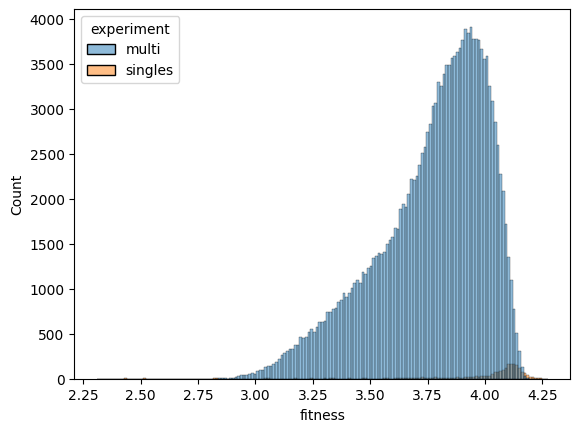

In [51]:
sns.histplot(data=df, x="fitness", hue="experiment", stat="count")

the single mutants seems to have generally higher fitness than the multi-mutants

<Axes: xlabel='fitness', ylabel='Count'>

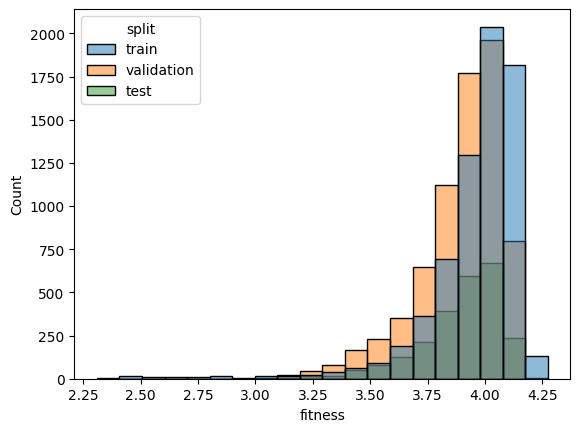

In [52]:
sns.histplot(data=df, x="fitness", hue="split", hue_order=["train", "validation", "test"], bins=20)

<Axes: >

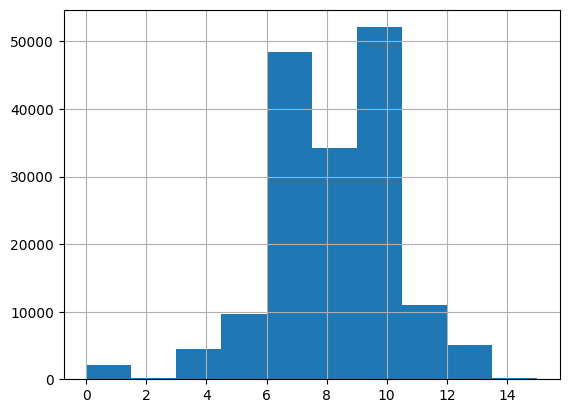

In [53]:
df["num_mut"].hist()

<Axes: >

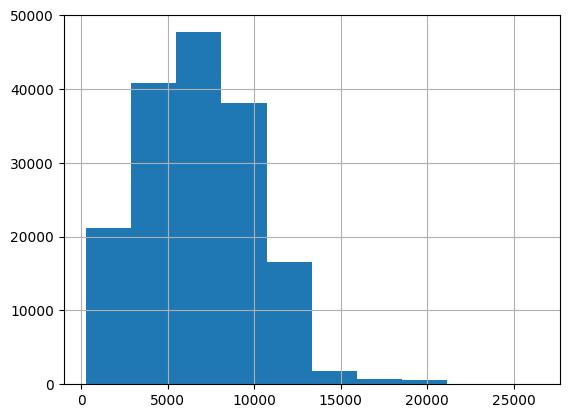

In [54]:
df["mean"].hist()